### Optmization

In this notebook we are going to show a simple optimization process and illustrate the concept of cost surface.

In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Amount of inliers:  500
Amount of outliers: 50


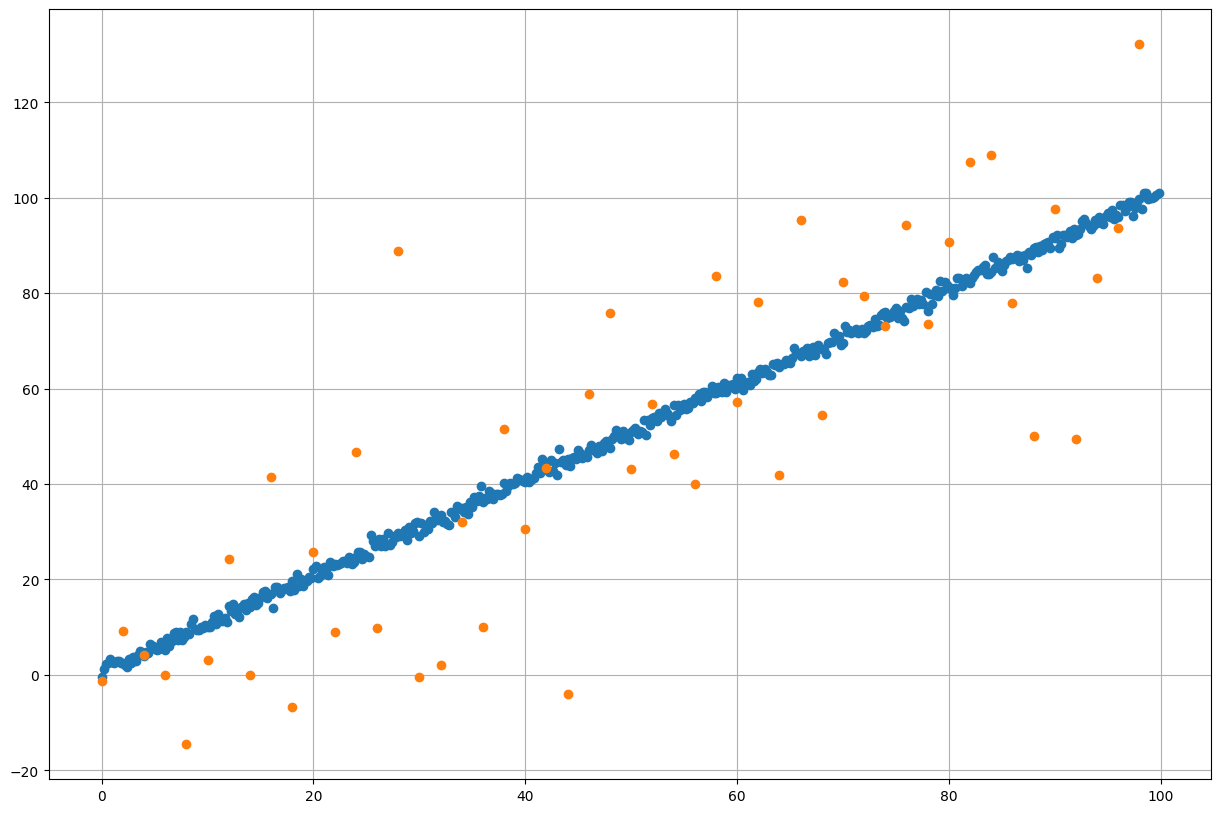

In [3]:
# Target hyper-parameters
slope = 45
slope = np.tan(np.deg2rad(slope))
offset = 1

# Let's contaminate target data with noise
x_data = np.arange(0, 100, 0.2)
y_data = slope*x_data + offset + np.random.randn(len(x_data))

# Add unrelated samples (outliers) to dataset
x_noise = np.arange(0, 100, 2)
y_noise = slope*x_noise + offset + 25*np.random.randn(len(x_noise))

plt.plot(x_data, y_data, 'o'), plt.grid(True)
plt.plot(x_noise, y_noise, 'o'), plt.grid(True)

# Mix true (noisy) data and outliers
x = np.concatenate((x_data, x_noise))
y = np.concatenate((y_data, y_noise))
indices = range(len(x))

print('Amount of inliers: ', len(x_data))
print('Amount of outliers:', len(x_noise))


In [4]:
# Define distance from point to line
def distance(a, b, c, x_point, y_point):
    numerator = np.abs(a*x_point + b*y_point + c)
    denominator = np.sqrt(a**2 + b**2)
    return numerator/denominator

alpha = np.arange(0, 360)
offset = np.arange(-100, 100)
cost = np.zeros((len(offset), len(alpha)))

for idx_alpha in range(len(alpha)):
    for idx_offset in range(len(offset)):
        slope = np.tan(np.deg2rad(alpha[idx_alpha]))        
        cost[idx_offset, idx_alpha] = np.mean(distance(-slope, 1, -offset[idx_offset], x, y))
        
        

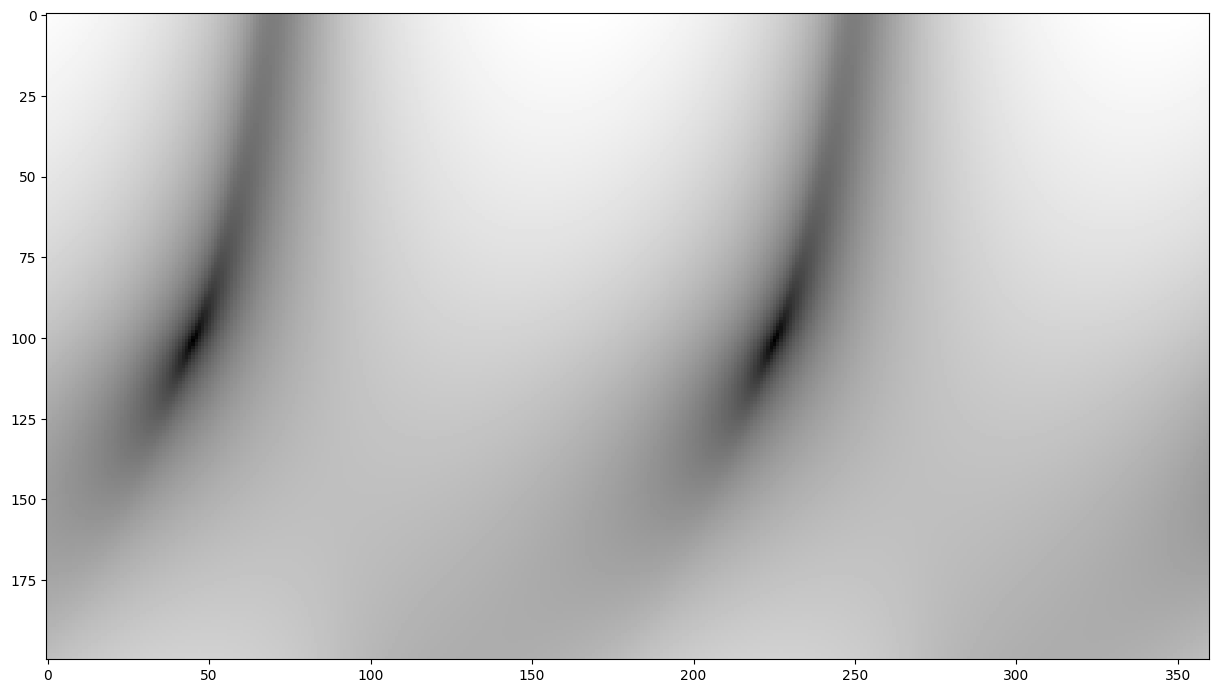

In [5]:
plt.imshow(np.log(cost), cmap='gray')

## Додаткове завдання 2 (Оптимізація)
1. Графік, зображений на останньому виведеному зображенні, є графічним представленням поверхні втрат (cost surface). Він візуалізує значення функції втрат для різних комбінацій параметрів моделі - нахилу (angle alpha) та зсуву (offset). Темні регіони на графіку відповідають нижчим значенням функції втрат, що вказує на кращу відповідність моделі даним.

2. Для визначення нахилу лінії, що відповідає мінімальному значенню функції втрат, потрібно знайти найтемніший стовпчик на графіку поверхні втрат. Візуально видно, що це приблизно 45 градусів.

3. Для визначення зсуву прямої, що відповідає мінімальному значенню функції втрат, потрібно знайти найтемніший рядок на графіку поверхні втрат. Візуально видно, що це близько до значення 1.

4. Так, отримані значення параметрів прямої (нахил близько 45 градусів і зсув близько 1) дуже близькі до значень, які були використані для генерації вихідних даних (нахил 45 градусів і зсув 1).

5. Щоб отримати точні значення параметрів прямої та функції втрат з найменшими втратами, потрібно знайти індекси мінімального елементу в матриці cost:


In [6]:
min_idx = np.unravel_index(np.argmin(cost, axis=None), cost.shape)
min_angle = alpha[min_idx[1]]
min_offset = offset[min_idx[0]]
min_cost = cost[min_idx]

print(f"Найменші втрати: {min_cost:.2f}")
print(f"Відповідний нахил: {min_angle:.2f} градусів")
print(f"Відповідний зсув: {min_offset:.2f}")

Найменші втрати: 1.57
Відповідний нахил: 45.00 градусів
Відповідний зсув: 1.00


6. Алгоритмом, який допомагає знайти напрямок, в якому потрібно рухатися для зменшення функції втрат і потрапити в "найнижчу" точку на поверхні втрат, є градієнтний спуск (gradient descent). Це ітеративний алгоритм оптимізації, який обчислює градієнт функції втрат відносно її параметрів і рухається в напрямку, протилежному до градієнта, для зменшення значення функції втрат. Градієнтний спуск широко використовується в машинному навчанні для навчання моделей, таких як лінійна регресія, логістична регресія та нейронні мережі.